<a href="https://colab.research.google.com/github/ALONSO93MARTINEZ/Proyect-Pipeline/blob/main/Lopez_Omar_M1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyect Pipeline

Grupo 1:
- Amesquita Ramos Marco Antonio
- CASTILLO ROBLES TANIA CAMILA
- Lopez Martinez Omar Alonso

https://github.com/ALONSO93MARTINEZ/Proyect-Pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_excel("Real estate valuation data set.xlsx")
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [ ]:
def data_cargada(file_path):
    df = pd.read_excel(file_path)
    return df

In [ ]:
def EDA(data_cargada):
  print("\nEstadísticas descriptivas del DataFrame:")
  return display(data_cargada.head()), data_cargada.info(), display(data_cargada.describe())

In [ ]:
EDA(df)


Estadísticas descriptivas del DataFrame:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


(None, None, None)

In [ ]:
def data_preprocesada(df):

    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numerical_cols.remove('Y house price of unit area')
    if 'No' in numerical_cols:
        numerical_cols.remove('No')

    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

In [ ]:
df_procesada = data_preprocesada(df.copy())
print("Data Procesada:")
display(df_procesada.head())

Data Procesada:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,0.272727,0.730594,0.009513,1.0,0.616941,0.719323,37.9
1,2,0.272727,0.445205,0.043809,0.9,0.584949,0.711451,42.2
2,3,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,47.3
3,4,0.909091,0.303653,0.083315,0.5,0.671231,0.758896,54.8
4,5,0.181818,0.114155,0.056799,0.5,0.573194,0.743153,43.1


In [ ]:
def regresion_lineal(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [ ]:
feature_cols = [col for col in df.columns if col not in ['No', 'Y house price of unit area']]
X = df[feature_cols]
y = df['Y house price of unit area']

print("Cordenadas:", X.shape)
print("Objetivo:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Cordenadas: (414, 6)
Objetivo: (414,)
Dimensiones de los conjuntos de datos:
X_train: (331, 6)
X_test: (83, 6)
y_train: (331,)
y_test: (83,)


In [ ]:
model = regresion_lineal(X_train, y_train)
print("Linear Regression model trained successfully using the function.")

Linear Regression model trained successfully using the function.


In [ ]:
def evaluar(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

In [ ]:
mse, r2, y_pred = evaluar(model, X_test, y_test)

print(f"Error (EMM) en el modelo evaluado: {mse:.2f}")
print(f"R-cuadrado (R2) en el modelo evaluado: {r2:.2f}")

Error (EMM) en el modelo evaluado: 53.50
R-cuadrado (R2) en el modelo evaluado: 0.68


In [ ]:
def resultados(y_test, y_pred, model, feature_names):
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=results_df)
    plt.title('Actual vs Precios previstos')
    plt.xlabel('Precio Unitario por Area Actual')
    plt.ylabel('Precio Unitario por Area Previsto')
    plt.grid(True)
    plt.show()

    coefficients_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': model.coef_})
    coefficients_df = coefficients_df.sort_values(by='Coeficiente', ascending=False)

    print("\nCoeficientes del modelo:")
    display(coefficients_df)

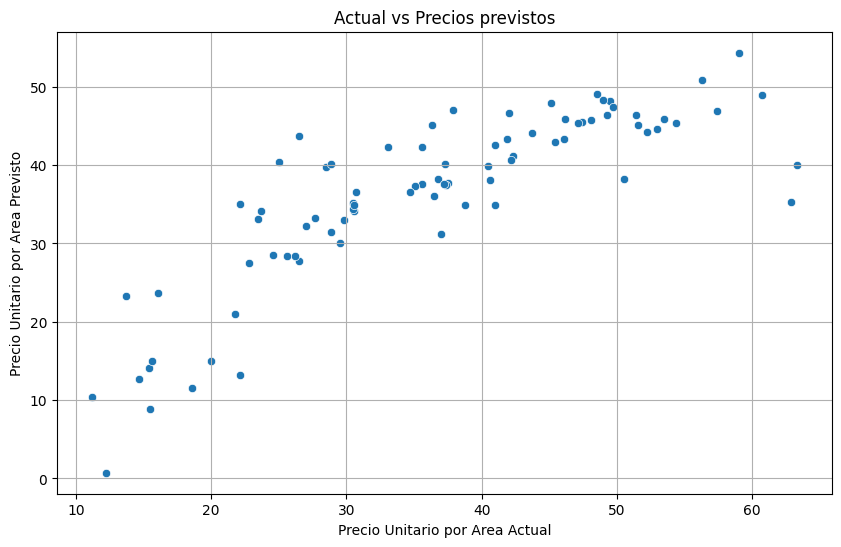


Coeficientes del modelo:


,Variable,Coeficiente
4,X5 latitude,229.049043
0,X1 transaction date,5.443262
3,X4 number of convenience stores,1.091469
2,X3 distance to the nearest MRT station,-0.004759
1,X2 house age,-0.270794
5,X6 longitude,-29.503389


In [ ]:
resultados(y_test, y_pred, model, X.columns)

In [ ]:
def pipeline(file_path):
    print("--- Data Pipeline ---")

    print("Cargando data...")
    df = data_cargada(file_path)
    print("Data cargada exitosamente.")

    print("Realizando EDA...")
    EDA(df)
    print("EDA completada.")

    print("Preprocesando data...")
    df_procesada = data_preprocesada(df.copy())
    print("Data completada.")

    print("Preparando data para modelado...")
    feature_cols = [col for col in df_procesada.columns if col not in ['No', 'Y house price of unit area']]
    X = df_procesada[feature_cols]
    y = df_procesada['Y house price of unit area']
    print(f"Cordenadas: {X.shape}, Objetivo: {y.shape}")

    print("División de datos en conjuntos de entrenamiento y prueba...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
    print("Data completa.")

    print("Realizando Regresion lineal...")
    model = regresion_lineal(X_train, y_train)
    print("Modelo completo.")

    print("Evaluando modelado...")
    mse, r2, y_pred = evaluar(model, X_test, y_test)
    print(f"Error (EMM) en el modelo evaluado: {mse:.2f}")
    print(f"R-cuadrado (R2) en el modelo evaluado: {r2:.2f}")
    print("Model evaluado.")

    print("Resultados y analsis...")
    resultados(y_test, y_pred, model, X.columns)
    print("Visualizacion completo.")

    print("--- Data Pipeline concretada ---")

--- Data Pipeline ---
Cargando data...
Data cargada exitosamente.
Realizando EDA...

Estadísticas descriptivas del DataFrame:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


EDA completada.
Preprocesando data...
Data completada.
Preparando data para modelado...
Cordenadas: (414, 6), Objetivo: (414,)
División de datos en conjuntos de entrenamiento y prueba...
X_train: (331, 6), X_test: (83, 6)
y_train: (331,), y_test: (83,)
Data completa.
Realizando Regresion lineal...
Modelo completo.
Evaluando modelado...
Error (EMM) en el modelo evaluado: 53.50
R-cuadrado (R2) en el modelo evaluado: 0.68
Model evaluado.
Resultados y analsis...


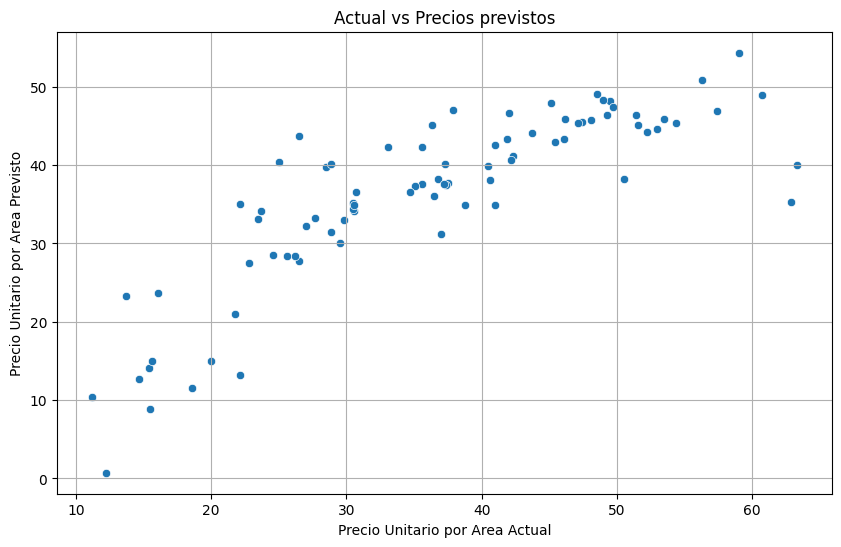


Coeficientes del modelo:


,Variable,Coeficiente
4,X5 latitude,18.901127
3,X4 number of convenience stores,10.914692
0,X1 transaction date,4.989657
5,X6 longitude,-2.736144
1,X2 house age,-11.860790
2,X3 distance to the nearest MRT station,-30.763164


Visualizacion completo.
--- Data Pipeline concretada ---


In [ ]:
file_path = "Real estate valuation data set.xlsx"
pipeline(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git config --global user.name = "ALONSO93MARTINEZ"
!git config --global user.email = "mtz.93.alo@gmail.com"

In [ ]:
!git clone https://github.com/ALONSO93MARTINEZ/Proyect-Pipeline.git /content/drive/MyDrive/Pipeline

Cloning into '/content/drive/MyDrive/Pipeline'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 73.21 KiB | 1.24 MiB/s, done.


In [ ]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 7 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Lopez_Omar_M1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add --all

In [ ]:
!git commit -m "Pipeline"

[main 3c62682] Pipeline
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!git push -u main

Enumerating objects: 26, done.
Counting objects: 100% (26/26), done.
Delta compression using up to 2 threads
Compressing objects: 100% (25/25), done.
Writing objects: 100% (25/25), 109.45 KiB | 640.00 KiB/s, done.
Total 25 (delta 14), reused 0 (delta 0), pack-reused 0
remote: error: refusing to update checked out branch: refs/heads/main
remote: error: By default, updating the current branch in a non-bare repository
remote: is denied, because it will make the index and work tree inconsistent
remote: with what you pushed, and will require 'git reset --hard' to match
remote: the work tree to HEAD.
remote: 
remote: You can set the 'receive.denyCurrentBranch' configuration variable
remote: to 'ignore' or 'warn' in the remote repository to allow pushing into
remote: its current branch; however, this is not recommended unless you
remote: arranged to update its work tree to match what you pushed in some
remote: other way.
remote: 
remote: To squelch this message and still keep the default beha

In [ ]:
!git branch your-new-branch-name
!git checkout your-new-branch-name
!git push -u origin your-new-branch-name

fatal: A branch named 'your-new-branch-name' already exists.
M	Lopez_Omar_M1.ipynb
Already on 'your-new-branch-name'
fatal: could not read Username for 'https://github.com': No such device or address
